In [30]:
import numpy as np
import matplotlib.pyplot as plt
import

In [39]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [36]:
#@title Plotting Functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
 
    fig, ax = plt.subplots()
    ax.scatter(x, y, label='Observed')  # our data scatter plot
    ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
    ymin = np.minimum(y, y_hat)
    ymax = np.maximum(y, y_hat)
    ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
    ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
    ax.legend()

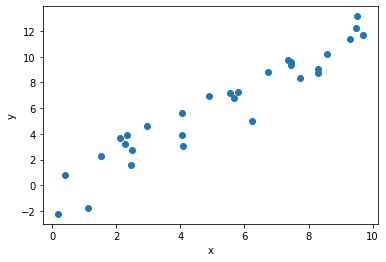

In [37]:
# @title

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');


In [32]:
def mse(x, y, theta_hat):
  
  ####################################################
  ## TODO for students: compute the mean squared error
  # Fill out function and remove
  #  raise NotImplementedError("Student exercise: compute the mean squared error")
  ####################################################
    
  # Compute the estimated y
    y_hat = theta_hat*x

  # Compute mean squared error
    mse = np.sum((y_hat-y)**2)/x.size
    
    return mse
theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
    print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")
    




theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


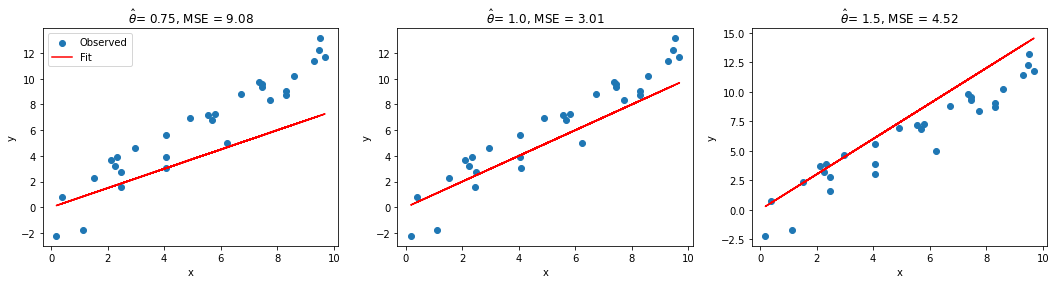

In [33]:
#@title

#@markdown Execute this cell to visualize estimated models

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
    ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
    y_hat = theta_hat * x
    ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

    ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

In [40]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
    y_hat = theta_hat * x
    plot_observed_vs_predicted(x, y, y_hat, theta_hat)

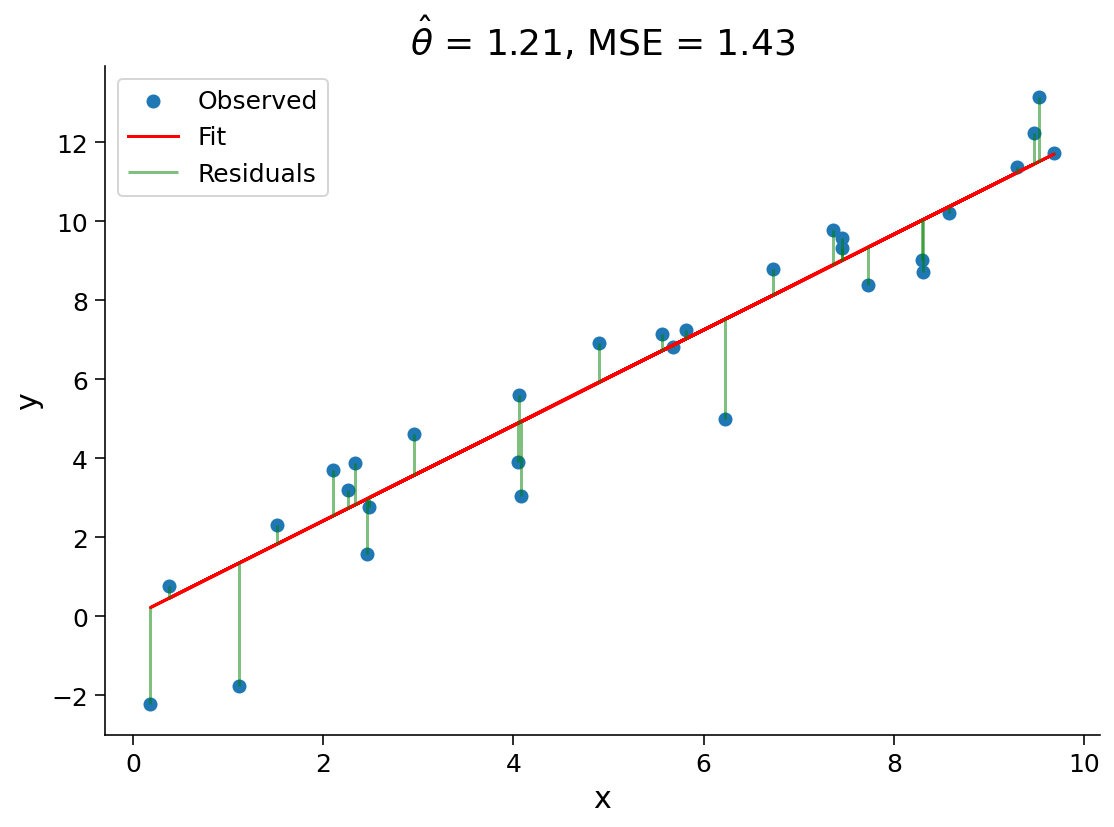

In [41]:
def solve_normal_eqn(x, y):


  ################################################################################
  ## TODO for students: solve for the best parameter using least squares
  # Fill out function and removeraise NotImplementedError("Student exercise: solve for theta_hat using least squares")
  ################################################################################

  # Compute theta_hat analytically
    theta_hat = np.sum(x*y)/np.sum(x**2)

    return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x
plot_observed_vs_predicted(x, y, y_hat, theta_hat)